# 🔮 Importaciones necesarias para el proyecto

In [1]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
print(f"Versión de OpenCV: {cv2.__version__}")
print(f"Versión de Numpy: {np.__version__}")
print(f"Versión de Pandas: {pd.__version__}")
print(f"Versión de TensorFlow: {tf.__version__}")
print(f"Version de Sklearn: {sk.__version__}")
print(f"Versión de Matplotlib.pyplot: {mpl.__version__}")

Versión de OpenCV: 4.8.1
Versión de Numpy: 1.21.5
Versión de Pandas: 1.3.5
Versión de TensorFlow: 2.1.0
Version de Sklearn: 1.0.2
Versión de Matplotlib.pyplot: 3.5.3


In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 📂 Configuraciones del path para lectura

In [4]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
print(os.getcwd())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier


In [5]:
# Obtenemos la dirección actual del path donde se está ejecutando el Jupyter Notebook
cwd = os.getcwd()
# Nos movemos a la carpeta donde se encuentran las imágenes a testear
os.chdir(f"{cwd}/classifier_resized/")
# Verificamos que nos encontramos en el path correcto
print(os.getcwd())
principal_directory = os.getcwd()

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\classifier_resized


In [6]:
# Listamos los archivos de la ruta
print(os.listdir())

['speeds', 'stops', 'trafficLights']


# 🧐 Lectura de imágenes

In [7]:
images = []
labels = []

i = 0
# Itera sobre las carpetas dentro del directorio principal
for folder in os.listdir(principal_directory):
    folder_path = os.path.join(principal_directory, folder)
    
    # Verifica si el elemento en el directorio es una carpeta
    if os.path.isdir(folder_path):
        
        # Etiqueta de la carpeta
        label = i
        
        # Itera sobre los archivos dentro de la carpeta
        for file in os.listdir(folder_path):
            archivo_path = os.path.join(folder_path, file)
            
            # Lee la imagen con OpenCV y la agrega a la lista
            image = cv2.imread(archivo_path)
            
            # Convertir la imagen al espacio de color RGB desde BGR (formato por defecto de OpenCV)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Normaliza los valores de la imagen de 0 a 1
            normalized_img = image / 255.0
            images.append(normalized_img)
            labels.append(label)
            
    i += 1
            
# Crear un DataFrame a partir de las listas de imágenes y etiquetas
data = {'Images': images, 'Labels': labels}
df = pd.DataFrame(data)            
            
index = np.random.randint(0, len(images))
print("Pixeles de la imagen antes de la normalización: ", images[index][5][5] * 255)
print("Pixeles de la imagen después de la normalización: ", images[index][5][5])
print("-------------------------------------------------------------------------------")
print(len(images))
print(len(labels))

Pixeles de la imagen antes de la normalización:  [211. 220. 227.]
Pixeles de la imagen después de la normalización:  [0.82745098 0.8627451  0.89019608]
-------------------------------------------------------------------------------
375
375


In [8]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
os.chdir(f"{cwd}/classifier/")
print(os.getcwd())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\classifier


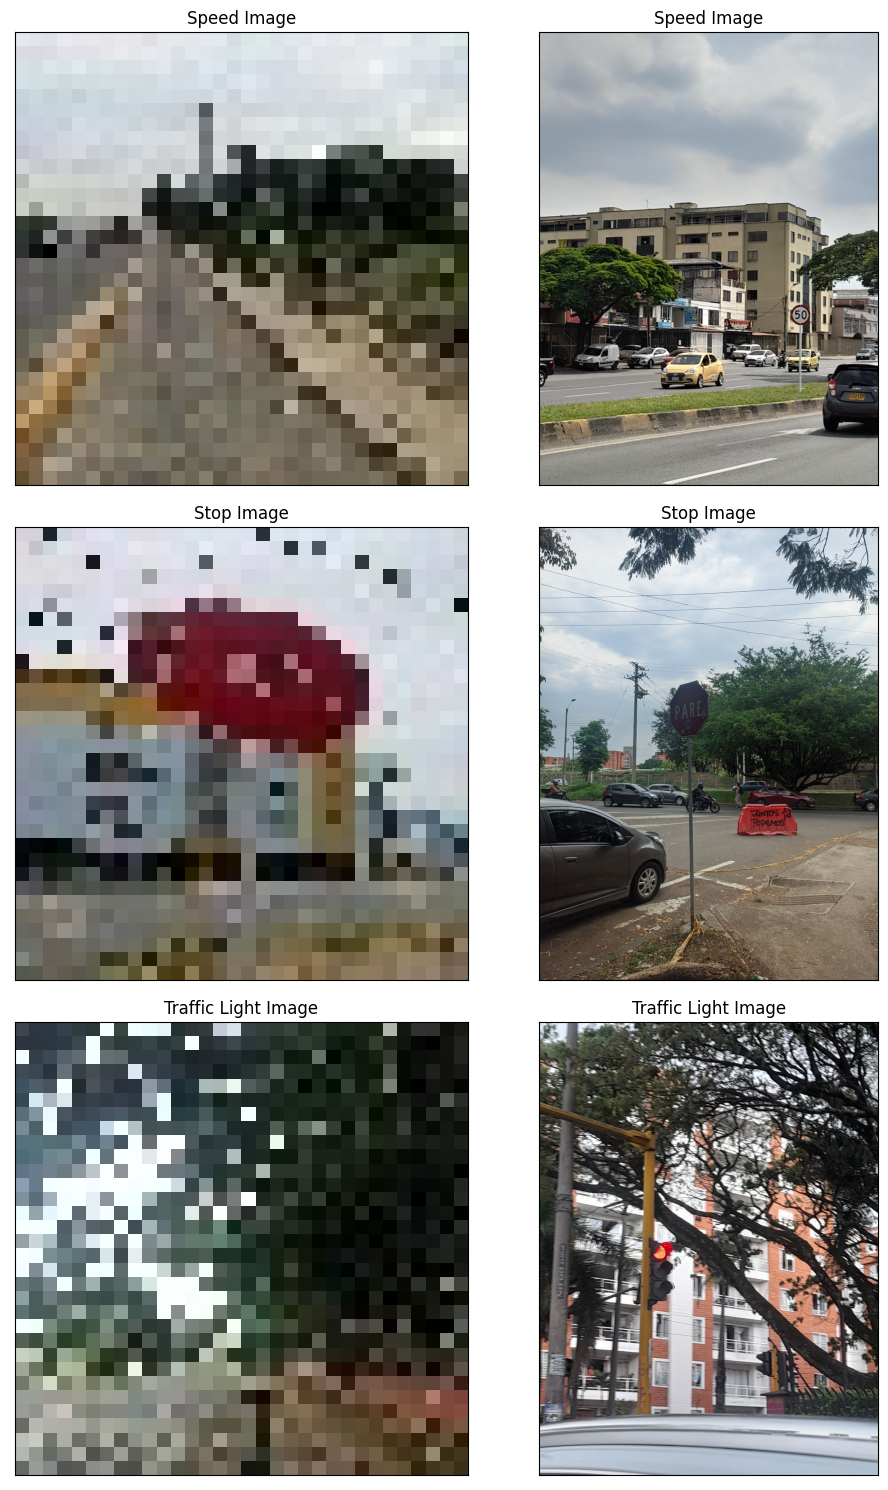

Index Speed: 98
Index Speed normal: 99
Index Stop: 185
Index Stop normal: 60
Index TrafficLight: 322
Index TrafficLight: 72


In [9]:
# Inicializa la figura
plt.figure(figsize=(10, 15))

indexSpeed = np.random.randint(0, 125)
plt.subplot(3, 2, 1), plt.imshow(images[indexSpeed])
plt.gca().set_title('Speed Image')
plt.xticks([]), plt.yticks([])

image_speed = cv2.cvtColor(cv2.imread(f"speeds/Velocidad-{indexSpeed + 1}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 2), plt.imshow(image_speed)
plt.gca().set_title('Speed Image')
plt.xticks([]), plt.yticks([])

indexStop = np.random.randint(125, 250)
plt.subplot(3, 2, 3), plt.imshow(images[indexStop])
plt.gca().set_title('Stop Image')
plt.xticks([]), plt.yticks([])

image_stop = cv2.cvtColor(cv2.imread(f"stops/Pare-{indexStop - 125}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 4), plt.imshow(image_stop)
plt.gca().set_title('Stop Image')
plt.xticks([]), plt.yticks([])

indexTrafficLight = np.random.randint(250, 375)
plt.subplot(3, 2, 5), plt.imshow(images[indexTrafficLight])
plt.gca().set_title('Traffic Light Image')
plt.xticks([]), plt.yticks([])

image_trafficlight = cv2.cvtColor(cv2.imread(f"trafficLights/Semaforo-{indexTrafficLight - 250}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 6), plt.imshow(image_trafficlight)
plt.gca().set_title('Traffic Light Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

print(f"Index Speed: {indexSpeed}")
print(f"Index Speed normal: {indexSpeed + 1}")
print(f"Index Stop: {indexStop}")
print(f"Index Stop normal: {indexStop - 125}")
print(f"Index TrafficLight: {indexTrafficLight}")
print(f"Index TrafficLight: {indexTrafficLight - 250}")

In [10]:
df.head(-1)

,Images,Labels
0,"[[[0.7372549019607844, 0.7803921568627451, 0.8...",0
1,"[[[0.6745098039215687, 0.7098039215686275, 0.7...",0
2,"[[[0.14901960784313725, 0.3137254901960784, 0....",0
3,"[[[0.13725490196078433, 0.20392156862745098, 0...",0
4,"[[[0.2235294117647059, 0.2901960784313726, 0.3...",0
...,...,...
369,"[[[0.6705882352941176, 0.6901960784313725, 0.7...",2
370,"[[[0.5607843137254902, 0.5647058823529412, 0.5...",2
371,"[[[0.4549019607843137, 0.47843137254901963, 0....",2
372,"[[[0.7254901960784313, 0.7333333333333333, 0.7...",2


In [11]:
x = np.array(df.Images.tolist())
y = np.array(df.Labels.tolist())
y = y.reshape((y.shape[0],-1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10, stratify=y)

num_classes = 3
y_train = to_categorical(y_train, num_classes) 
y_test = to_categorical(y_test, num_classes)

print(f"X_Train: {x_train.shape}")
print(f"X_Test: {x_test.shape}")
print(f"Y_Train: {y_train.shape}")
print(f"Y_Test: {y_test.shape}")

X_Train: (300, 32, 32, 3)
X_Test: (75, 32, 32, 3)
Y_Train: (300, 3)
Y_Test: (75, 3)


## Build the model

### Model taked from: [Kaggle](https://www.kaggle.com/code/yacharki/traffic-signs-image-classification-96-cnn)

In [12]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [13]:
# Callbacks
checkpoint = ModelCheckpoint(
                filepath = 'ModelV1.h5',
                monitor = 'accuracy',
                mode = 'max',
                save_best_only = True,
                save_weights_only = True
            )
stopping = EarlyStopping(
            monitor = 'accuracy',
            patience = 20,
            mode = 'max',
            restore_best_weights=True
        )

In [14]:
# Training the Model
start = time.time()
with tf.device('/GPU:0'):
    history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), callbacks=[checkpoint, stopping])
finish = time.time()
print(f"Se demoró: {finish - start} segundos.")

Train on 300 samples, validate on 75 samples
Epoch 1/200


300/300 [==============================] - 3s 9ms/sample - loss: 1.1177 - accuracy: 0.3133 - val_loss: 1.0929 - val_accuracy: 0.3867
Epoch 2/200
300/300 [==============================] - 0s 228us/sample - loss: 1.0885 - accuracy: 0.3867 - val_loss: 1.0674 - val_accuracy: 0.4000
Epoch 3/200
300/300 [==============================] - 0s 244us/sample - loss: 1.0503 - accuracy: 0.4233 - val_loss: 0.9590 - val_accuracy: 0.6400
Epoch 4/200
300/300 [==============================] - 0s 232us/sample - loss: 0.9974 - accuracy: 0.5167 - val_loss: 0.8965 - val_accuracy: 0.6000
Epoch 5/200
300/300 [==============================] - 0s 235us/sample - loss: 0.9194 - accuracy: 0.6200 - val_loss: 0.8073 - val_accuracy: 0.6267
Epoch 6/200
300/300 [==============================] - 0s 241us/sample - loss: 0.8794 - accuracy: 0.6267 - val_loss: 0.7428 - val_accuracy: 0.7333
Epoch 7/200
300/300 [==============================] - 0s 229us/sample - loss: 0.8065 - accuracy: 0.6533 - val_loss: 0.6892 - val_ac

In [15]:
loss, acc = model.evaluate(x_test,y_test, verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss, acc))

75/75 [==============================] - 0s 147us/sample - loss: 1.3012 - accuracy: 0.7467
Loss:1.3012195030848186 - Accuracy:0.746666669845581


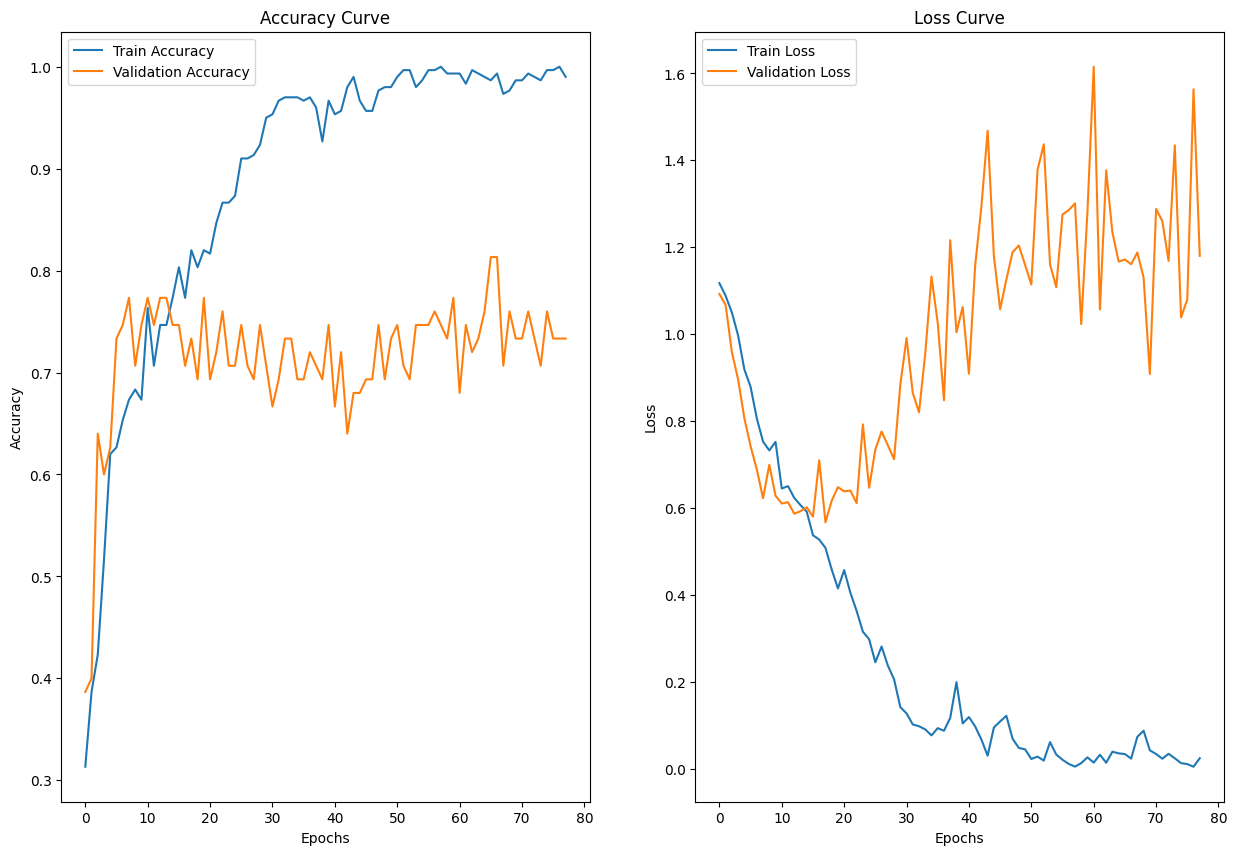

In [16]:
plt.figure(figsize=(15, 10))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


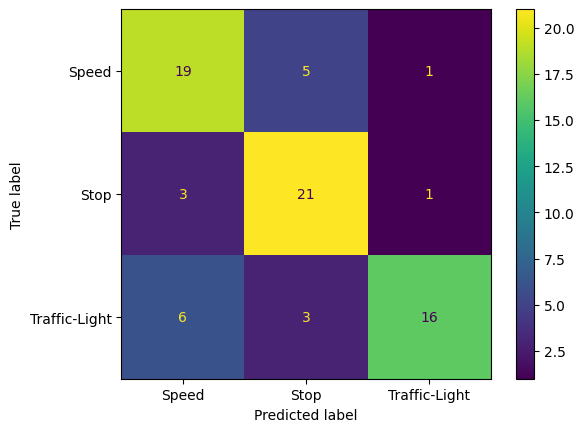

In [17]:
# Matriz de confusion
y_pred = model.predict(x_test)

# Convierte las matrices codificadas one-hot a etiquetas de clase
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Define las etiquetas de clase correspondientes a tus clases
clases = ["Speed", "Stop", "Traffic-Light"]

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test_labels, y_pred_labels, labels=range(len(clases)))

# Crea un gráfico de matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=clases)
disp.plot()
plt.show()

In [29]:
print(classification_report(y_test_labels, y_pred_labels, target_names = clases))

               precision    recall  f1-score   support

        Speed       0.68      0.76      0.72        25
         Stop       0.72      0.84      0.78        25
Traffic-Light       0.89      0.64      0.74        25

     accuracy                           0.75        75
    macro avg       0.76      0.75      0.75        75
 weighted avg       0.76      0.75      0.75        75



In [18]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
os.chdir(f"{cwd}/model_test/")
test_directory = os.getcwd()
print(os.getcwd())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\model_test


In [23]:
def convert_image(path):
    img = cv2.imread(path)
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(img_color, (32,32))
    normalized_img = resized_img / 255.0
    good_image = np.reshape(normalized_img, (1, 32, 32, 3))
    return good_image

ERROR! Session/line number was not unique in database. History logging moved to new session 70


In [24]:
# Lee la imagen
image_Test_Speed = convert_image(f"{test_directory}/speed-1.jpg")
image_Test_Stop = convert_image(f"{test_directory}/stop-1.jpg")
image_Test_Traffic_Light = convert_image(f"{test_directory}/trafficlight-1.jpg")

In [26]:
start = time.time()
y_pred_speed = model.predict(image_Test_Speed)
print(y_pred_speed.argmax())
finish = time.time()
print(f"Se demoró: {finish - start} segundos.")

2
Se demoró: 0.03508400917053223 segundos.


In [27]:
start = time.time()
y_pred_stop = model.predict(image_Test_Stop)
print(y_pred_stop.argmax())
finish = time.time()
print(f"Se demoró: {finish - start} segundos.")

1
Se demoró: 0.03755331039428711 segundos.


In [28]:
start = time.time()
y_pred_trafficlight = model.predict(image_Test_Traffic_Light)
print(y_pred_trafficlight.argmax())
finish = time.time()
print(f"Se demoró: {finish - start} segundos.")

1
Se demoró: 0.023546218872070312 segundos.
